In [ ]:
import pandas as pd
train_user_df=pd.read_csv("/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/train_users_2.csv")
train_user_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [ ]:
session_data_path = '/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/sessions.csv'
session_data = pd.read_csv(session_data_path)
session_data.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [ ]:
import pandas as pd

# 데이터 로드
session_data_path = '/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/sessions.csv'
train_data_path = '/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/train_users_2.csv'

session_data = pd.read_csv(session_data_path)
train_data = pd.read_csv(train_data_path)

# 데이터 타입 최적화 (예시로 일부 컬럼을 변경, 실제 데이터에 맞게 조정 필요)
train_data['id'] = train_data['id'].astype('category')
session_data['user_id'] = session_data['user_id'].astype('category')

# 데이터 병합
merged_data = pd.merge(session_data, train_data, left_on='user_id', right_on='id', how='inner')

# 예약이 있는 사용자만 필터링
booked_users = merged_data[merged_data['date_first_booking'].notna()]

# DAU, WAU, MAU 계산
booked_users['date'] = pd.to_datetime(booked_users['timestamp_first_active'], format='%Y%m%d%H%M%S')

# Daily Active Users (DAU)
dau = booked_users.groupby(booked_users['date'].dt.date).size()

# Weekly Active Users (WAU)
wau = booked_users.groupby(pd.Grouper(key='date', freq='W')).size()

# Monthly Active Users (MAU)
mau = booked_users.groupby(pd.Grouper(key='date', freq='M')).size()

print("DAU:", dau)
print("WAU:", wau)
print("MAU:", mau)


<ipython-input-1-6568d4b42035>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booked_users['date'] = pd.to_datetime(booked_users['timestamp_first_active'], format='%Y%m%d%H%M%S')


DAU: date
2014-01-01     3704
2014-01-02     9897
2014-01-03     8590
2014-01-04     7364
2014-01-05     5636
              ...  
2014-06-26    15083
2014-06-27    20235
2014-06-28    16419
2014-06-29    16907
2014-06-30    17806
Length: 181, dtype: int64
WAU: date
2014-01-05     35191
2014-01-12     59832
2014-01-19     83457
2014-01-26     71611
2014-02-02     65754
2014-02-09     73487
2014-02-16     74787
2014-02-23     65675
2014-03-02     80689
2014-03-09     60723
2014-03-16     73908
2014-03-23     69575
2014-03-30     71679
2014-04-06     89043
2014-04-13    103469
2014-04-20    108469
2014-04-27    117364
2014-05-04    120343
2014-05-11    123206
2014-05-18    130103
2014-05-25    122121
2014-06-01    118294
2014-06-08    121984
2014-06-15    158078
2014-06-22    122214
2014-06-29    141385
2014-07-06     17806
Freq: W-SUN, dtype: int64
MAU: date
2014-01-31    301602
2014-02-28    291180
2014-03-31    302187
2014-04-30    460948
2014-05-31    544082
2014-06-30    580248
Freq:

In [ ]:
import pandas as pd

# 데이터 로드
session_data = pd.read_csv('/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/sessions.csv')
train_data = pd.read_csv('/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/train_users_2.csv')

# 데이터 병합
merged_data = pd.merge(session_data, train_data, left_on='user_id', right_on='id', how='inner')

# 예약 최대 날짜 찾기
max_booking_date = merged_data['date_first_booking'].value_counts().idxmax()

# 최대 예약 날짜 데이터 필터링
max_booking_data = merged_data[merged_data['date_first_booking'] == max_booking_date]

# 날짜 파싱
max_booking_data['date'] = pd.to_datetime(max_booking_data['timestamp_first_active'], format='%Y%m%d%H%M%S')

# 세그먼트별 DAU, WAU, MAU 계산
def calculate_metrics(data, segment, frequency):
    return data.groupby([pd.Grouper(key='date', freq=frequency), segment]).size().unstack(fill_value=0)

# Device Type별 계산
dau_device = calculate_metrics(max_booking_data, 'first_device_type', 'D')
wau_device = calculate_metrics(max_booking_data, 'first_device_type', 'W')
mau_device = calculate_metrics(max_booking_data, 'first_device_type', 'M')

# Affiliate Channel별 계산
dau_affiliate = calculate_metrics(max_booking_data, 'affiliate_channel', 'D')
wau_affiliate = calculate_metrics(max_booking_data, 'affiliate_channel', 'W')
mau_affiliate = calculate_metrics(max_booking_data, 'affiliate_channel', 'M')

# 결과 출력
print("DAU by Device Type:\n", dau_device)
print("WAU by Device Type:\n", wau_device)
print("MAU by Device Type:\n", mau_device)
print("DAU by Affiliate Channel:\n", dau_affiliate)
print("WAU by Affiliate Channel:\n", wau_affiliate)
print("MAU by Affiliate Channel:\n", mau_affiliate)


DAU by Device Type:
 first_device_type  Android Phone  Android Tablet  Desktop (Other)  \
date                                                                
2014-01-15                     0               0                0   
2014-01-22                     0               0                0   
2014-01-27                     0               0                0   
2014-02-16                     0               0                0   
2014-02-22                     0               0                0   
2014-03-02                     0               0                0   
2014-03-04                     0               0                0   
2014-03-18                     0               0                0   
2014-03-20                     0               0                0   
2014-04-10                     0               0                0   
2014-04-13                     0               0                0   
2014-04-14                     0               0                0   
2014-04-15   

<ipython-input-2-fe5aca4277e3>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_booking_data['date'] = pd.to_datetime(max_booking_data['timestamp_first_active'], format='%Y%m%d%H%M%S')


<ipython-input-6-efb3e9fc4d2e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_booking_data['date'] = pd.to_datetime(max_booking_data['timestamp_first_active'], format='%Y%m%d%H%M%S')


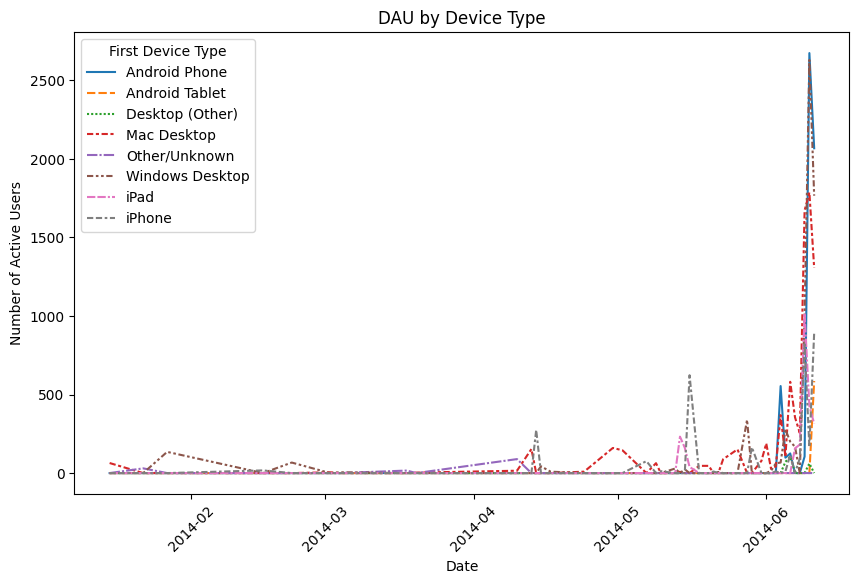

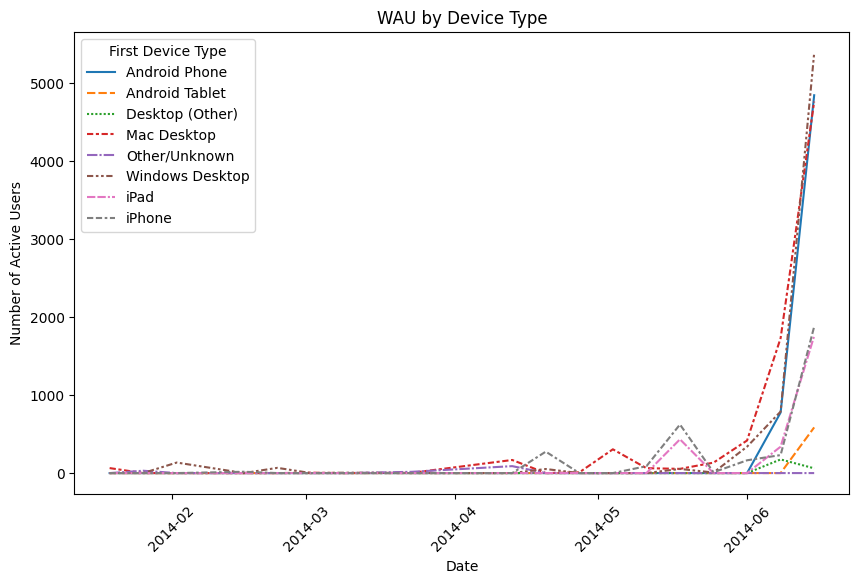

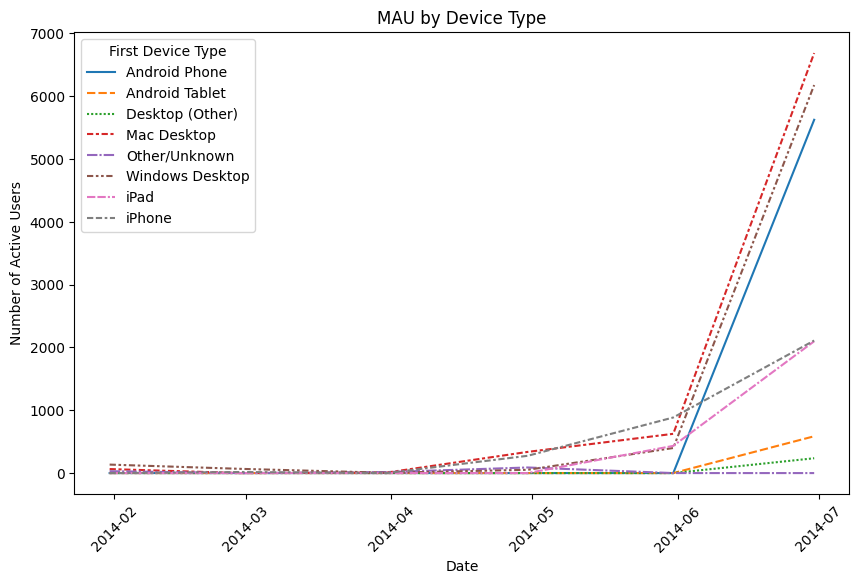

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 및 병합
session_data = pd.read_csv('/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/sessions.csv')
train_data = pd.read_csv('/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/train_users_2.csv')
merged_data = pd.merge(session_data, train_data, left_on='user_id', right_on='id', how='inner')

# 예약 최대 날짜 찾기
max_booking_date = merged_data['date_first_booking'].value_counts().idxmax()

# 최대 예약 날짜 데이터 필터링
max_booking_data = merged_data[merged_data['date_first_booking'] == max_booking_date]
max_booking_data['date'] = pd.to_datetime(max_booking_data['timestamp_first_active'], format='%Y%m%d%H%M%S')

# 세그먼트별 DAU, WAU, MAU 계산 함수
def calculate_metrics(data, segment, frequency):
    return data.groupby([pd.Grouper(key='date', freq=frequency), segment]).size().unstack(fill_value=0)

# 시각화 함수 정의
def plot_metrics(df, title, segment):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df)
    plt.title(title)
    plt.ylabel('Number of Active Users')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.legend(title=segment)
    plt.show()

# 계산 실행
dau_device = calculate_metrics(max_booking_data, 'first_device_type', 'D')
wau_device = calculate_metrics(max_booking_data, 'first_device_type', 'W')
mau_device = calculate_metrics(max_booking_data, 'first_device_type', 'M')

# Device Type별 DAU, WAU, MAU 시각화
segment = 'First Device Type'
for metric_df, metric_name in zip([dau_device, wau_device, mau_device], ['DAU', 'WAU', 'MAU']):
    plot_metrics(metric_df, f'{metric_name} by Device Type', segment)

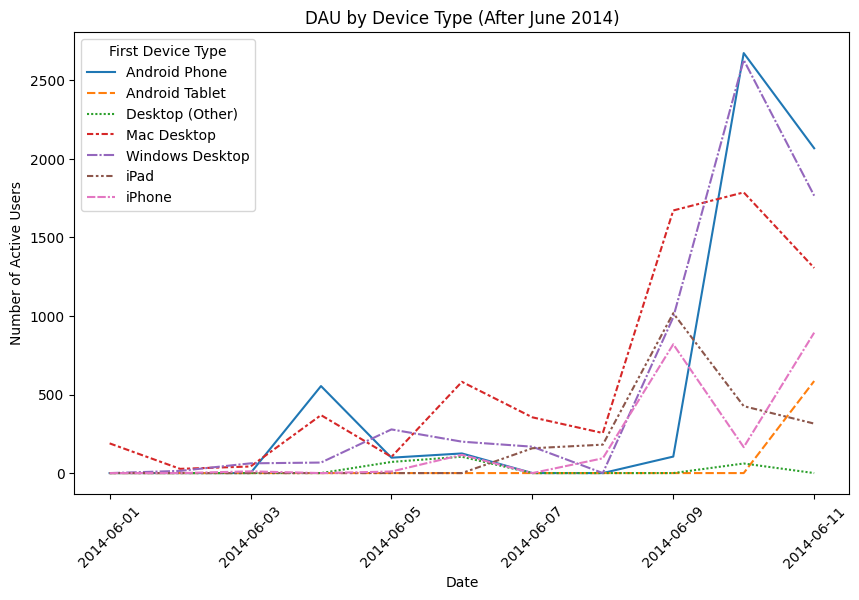

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 기존 데이터를 다시 로드하고 준비
# 데이터 로드 및 병합
session_data = pd.read_csv('/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/sessions.csv')
train_data = pd.read_csv('/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/train_users_2.csv')
merged_data = pd.merge(session_data, train_data, left_on='user_id', right_on='id', how='inner')

# timestamp_first_active를 datetime 형식으로 변환
merged_data['date'] = pd.to_datetime(merged_data['timestamp_first_active'], format='%Y%m%d%H%M%S')

# 예약 최대 날짜 찾기 및 해당 날짜에 대한 데이터 필터링
max_booking_date = merged_data[merged_data['date_first_booking'].notna()]['date_first_booking'].value_counts().idxmax()
filtered_data = merged_data[merged_data['date_first_booking'] == max_booking_date]

# 2014년 6월 이후 데이터 필터링
filtered_data = filtered_data[filtered_data['date'] >= pd.Timestamp('2014-06-01')]

# 세그먼트별 DAU 계산 함수
def calculate_metrics(data, segment, frequency):
    return data.groupby([pd.Grouper(key='date', freq=frequency), segment]).size().unstack(fill_value=0)

# 계산 실행
dau_device_filtered = calculate_metrics(filtered_data, 'first_device_type', 'D')

# 시각화
def plot_metrics(df, title, segment):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df)
    plt.title(title)
    plt.ylabel('Number of Active Users')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.legend(title=segment)
    plt.show()

# Device Type별 DAU 시각화
plot_metrics(dau_device_filtered, 'DAU by Device Type (After June 2014)', 'First Device Type')

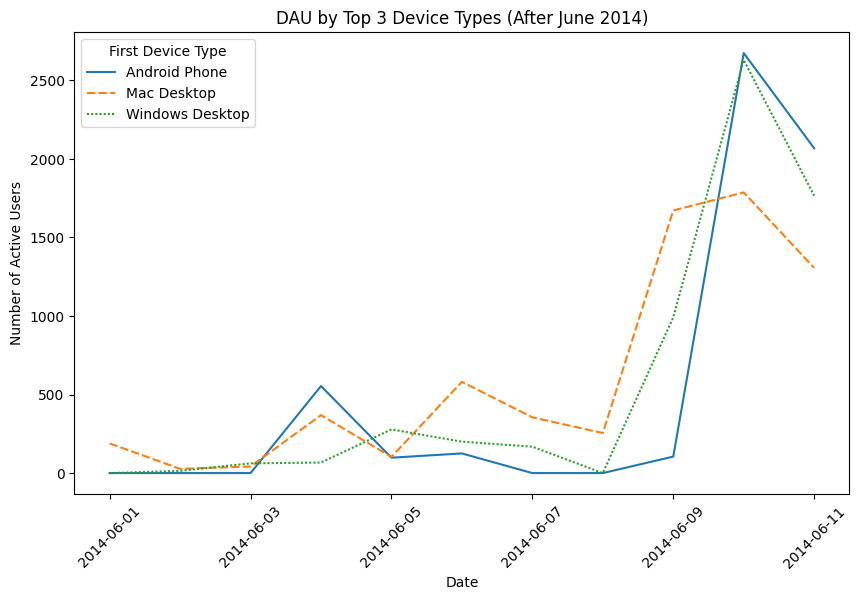

In [ ]:
# 'first_device_type'의 사용 빈도 계산 및 상위 3개 추출
top_3_devices = filtered_data['first_device_type'].value_counts().nlargest(3).index.tolist()

# 상위 3개 device type 데이터 필터링
filtered_data = filtered_data[filtered_data['first_device_type'].isin(top_3_devices)]

# 세그먼트별 DAU 계산 함수
def calculate_metrics(data, segment, frequency):
    return data.groupby([pd.Grouper(key='date', freq=frequency), segment]).size().unstack(fill_value=0)

# 계산 실행
dau_device_filtered = calculate_metrics(filtered_data, 'first_device_type', 'D')

# 시각화
def plot_metrics(df, title, segment):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df)
    plt.title(title)
    plt.ylabel('Number of Active Users')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.legend(title=segment)
    plt.show()

# Device Type별 DAU 시각화
plot_metrics(dau_device_filtered, 'DAU by Top 3 Device Types (After June 2014)', 'First Device Type')

channel별 DAU MAU WAU분석

<ipython-input-11-c4b1d8b4b98a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_booking_data['date'] = pd.to_datetime(max_booking_data['timestamp_first_active'], format='%Y%m%d%H%M%S')


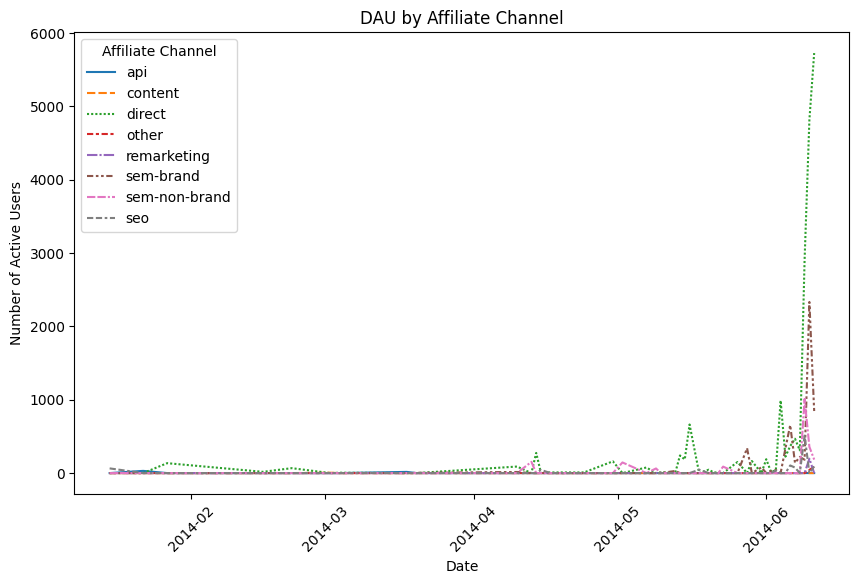

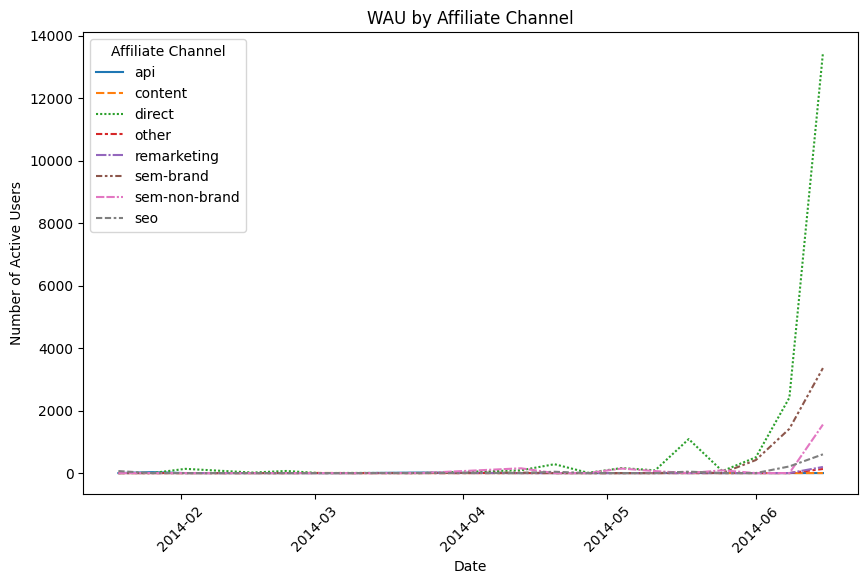

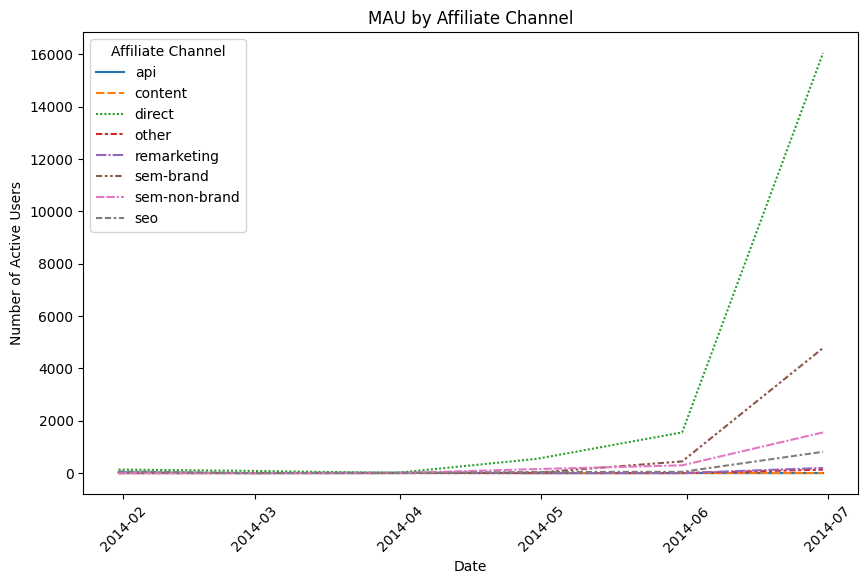

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 및 병합
session_data = pd.read_csv('/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/sessions.csv')
train_data = pd.read_csv('/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/train_users_2.csv')
merged_data = pd.merge(session_data, train_data, left_on='user_id', right_on='id', how='inner')

# 예약 최대 날짜 찾기
max_booking_date = merged_data['date_first_booking'].value_counts().idxmax()

# 최대 예약 날짜 데이터 필터링
max_booking_data = merged_data[merged_data['date_first_booking'] == max_booking_date]
max_booking_data['date'] = pd.to_datetime(max_booking_data['timestamp_first_active'], format='%Y%m%d%H%M%S')

# 세그먼트별 DAU, WAU, MAU 계산 함수
def calculate_metrics(data, segment, frequency):
    return data.groupby([pd.Grouper(key='date', freq=frequency), segment]).size().unstack(fill_value=0)

# 시각화 함수 정의
def plot_metrics(df, title, segment):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df)
    plt.title(title)
    plt.ylabel('Number of Active Users')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.legend(title=segment)
    plt.show()

# Affiliate Channel별 DAU, WAU, MAU 계산
dau_channel = calculate_metrics(max_booking_data, 'affiliate_channel', 'D')
wau_channel = calculate_metrics(max_booking_data, 'affiliate_channel', 'W')
mau_channel = calculate_metrics(max_booking_data, 'affiliate_channel', 'M')

# Affiliate Channel별 DAU, WAU, MAU 시각화
segment = 'Affiliate Channel'
for metric_df, metric_name in zip([dau_channel, wau_channel, mau_channel], ['DAU', 'WAU', 'MAU']):
    plot_metrics(metric_df, f'{metric_name} by Affiliate Channel', segment)


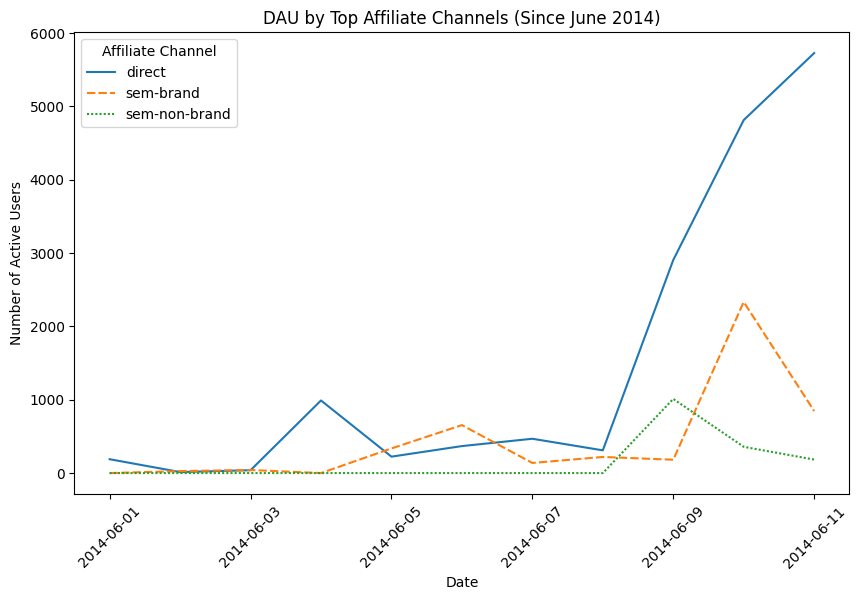

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 및 병합
session_data = pd.read_csv('/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/sessions.csv')
train_data = pd.read_csv('/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/train_users_2.csv')
merged_data = pd.merge(session_data, train_data, left_on='user_id', right_on='id', how='inner')

# timestamp_first_active를 datetime 형식으로 변환
merged_data['date'] = pd.to_datetime(merged_data['timestamp_first_active'], format='%Y%m%d%H%M%S')

# 예약 최대 날짜 찾기 및 해당 날짜에 대한 데이터 필터링
max_booking_date = merged_data['date_first_booking'].value_counts().idxmax()
filtered_data = merged_data[merged_data['date_first_booking'] == max_booking_date]

# 2014년 6월 1일 이후 데이터 필터링
filtered_data = filtered_data[filtered_data['date'] >= '2014-06-01']

# 'affiliate_channel'의 사용 빈도 계산 및 상위 3개 추출
top_channels = filtered_data['affiliate_channel'].value_counts().nlargest(3).index.tolist()

# 상위 3개 affiliate channel 데이터 필터링
filtered_data = filtered_data[filtered_data['affiliate_channel'].isin(top_channels)]

# 세그먼트별 DAU 계산 함수
def calculate_metrics(data, segment, frequency):
    return data.groupby([pd.Grouper(key='date', freq=frequency), segment]).size().unstack(fill_value=0)

# 계산 실행
dau_channel = calculate_metrics(filtered_data, 'affiliate_channel', 'D')

# 시각화
def plot_metrics(df, title, segment):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df)
    plt.title(title)
    plt.ylabel('Number of Active Users')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.legend(title=segment)
    plt.show()

# Affiliate Channel별 DAU 시각화
plot_metrics(dau_channel, 'DAU by Top Affiliate Channels (Since June 2014)', 'Affiliate Channel')


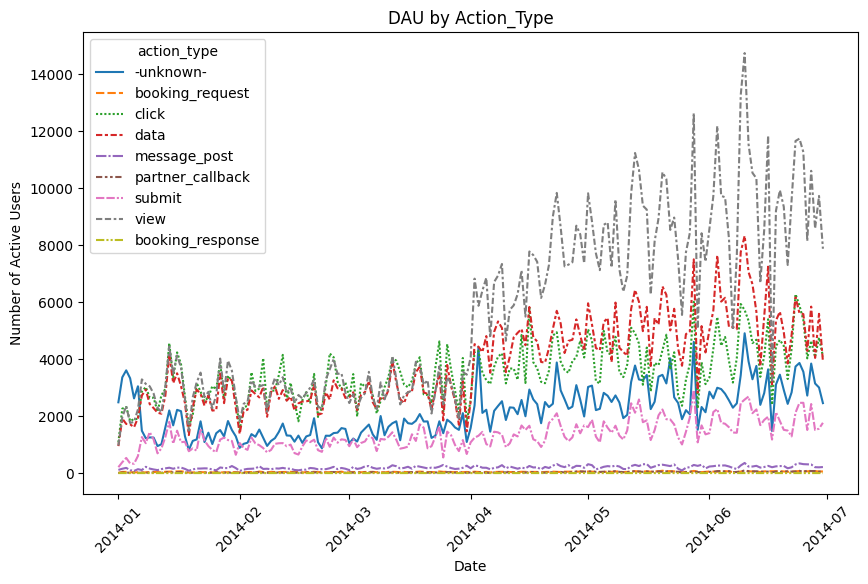

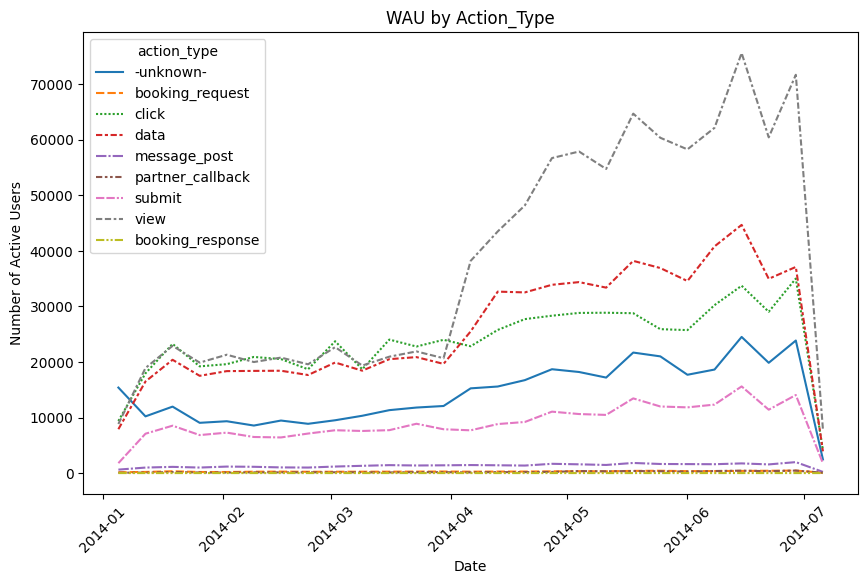

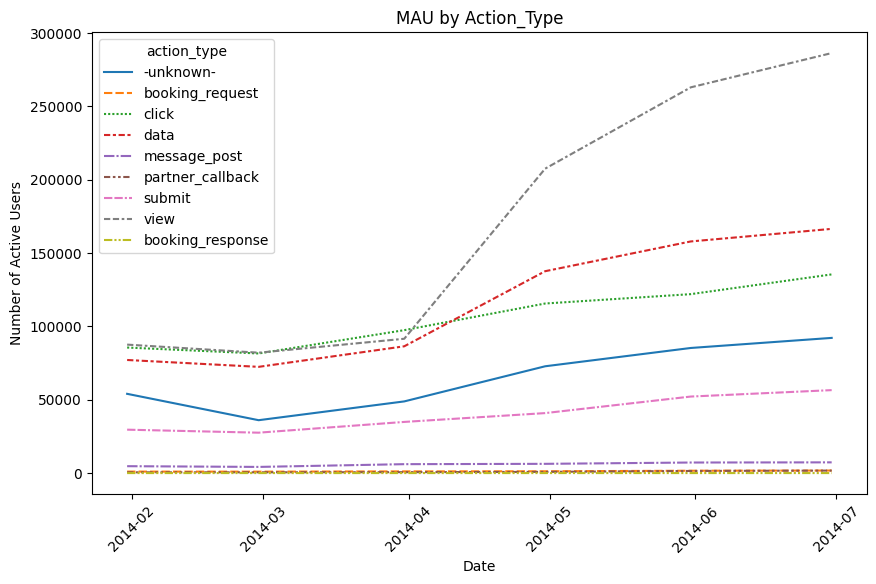

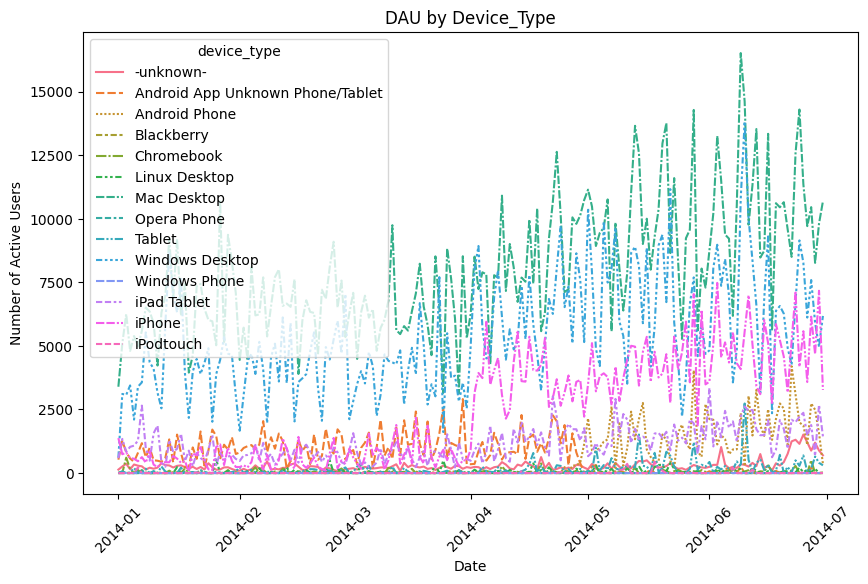

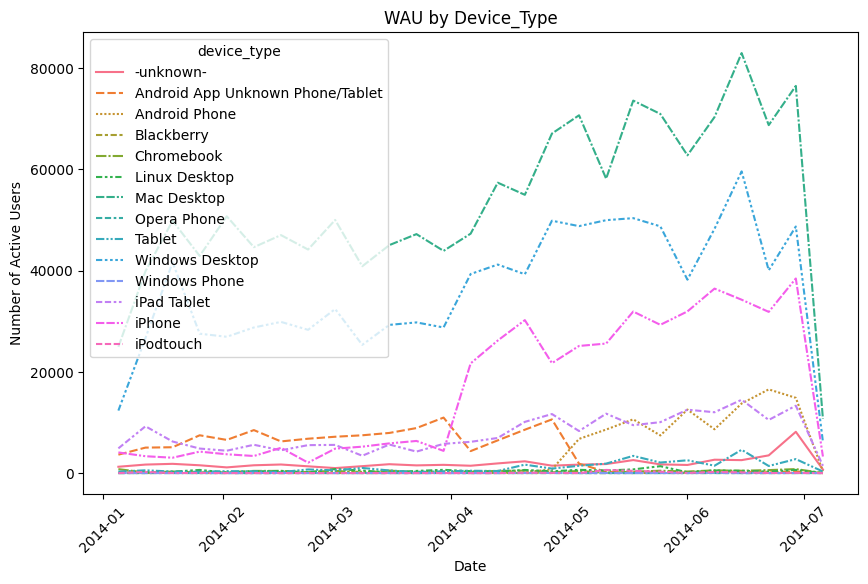

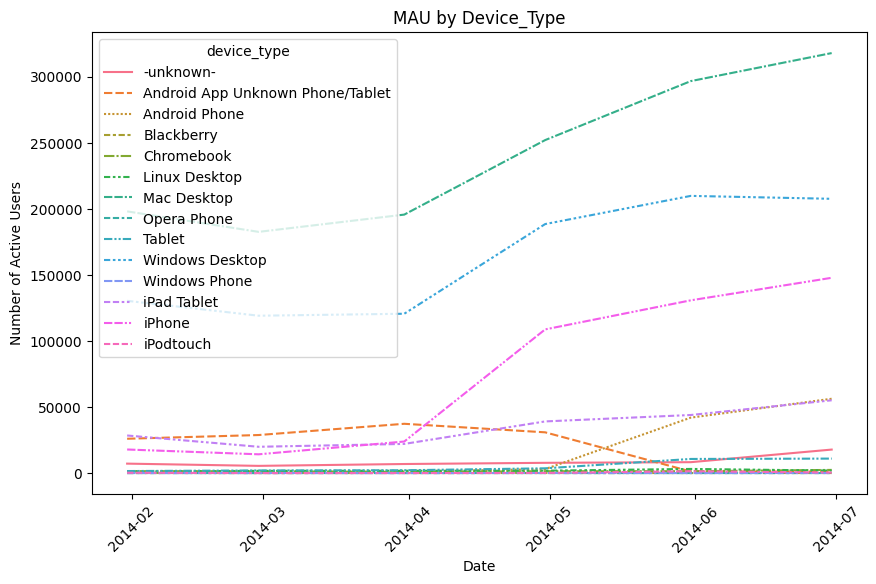

Conversion Rate: 0.21%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 사용자 데이터 로드

user_data = pd.read_csv('/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/train_users_2.csv')



# 예약 날짜를 datetime 형식으로 변환
user_data['date_first_booking'] = pd.to_datetime(user_data['date_first_booking'], errors='coerce')
user_data['timestamp_first_active'] = pd.to_datetime(user_data['timestamp_first_active'], format='%Y%m%d%H%M%S')

# 나이 필터 적용 (18세에서 122세)
user_data = user_data[(user_data['age'] >= 18) & (user_data['age'] <= 122)]

# 세션 데이터 로드
session_data = pd.read_csv('/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/sessions.csv')


# 사용자 데이터와 세션 데이터 병합
merged_data = pd.merge(session_data, user_data, how='left', left_on='user_id', right_on='id')

# 날짜 컬럼 생성
merged_data['date'] = pd.to_datetime(merged_data['timestamp_first_active'], format='%Y%m%d%H%M%S')

# 세그먼트별 DAU, WAU, MAU 계산 함수
def calculate_metrics(data, segment, frequency):
    return data.groupby([pd.Grouper(key='date', freq=frequency), segment]).size().unstack(fill_value=0)

# 시각화 함수 정의
def plot_metrics(df, title, segment):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df)
    plt.title(title)
    plt.ylabel('Number of Active Users')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.legend(title=segment)
    plt.show()

# Action Type별 DAU, WAU, MAU 계산 및 시각화
for segment in ['action_type', 'device_type']:
    dau = calculate_metrics(merged_data, segment, 'D')
    wau = calculate_metrics(merged_data, segment, 'W')
    mau = calculate_metrics(merged_data, segment, 'M')

    for metric_df, metric_name in zip([dau, wau, mau], ['DAU', 'WAU', 'MAU']):
        plot_metrics(metric_df, f'{metric_name} by {segment.title()}', segment)

# 전환율 계산
conversion_data = merged_data[merged_data['date_first_booking'].notnull()]
total_users = merged_data.shape[0]
converted_users = conversion_data['user_id'].nunique()
conversion_rate = (converted_users / total_users) * 100

print(f'Conversion Rate: {conversion_rate:.2f}%')


In [ ]:
print("Timestamp first active range:", merged_data['timestamp_first_active'].min(), "to", merged_data['timestamp_first_active'].max())
print("Date first booking range:", merged_data['date_first_booking'].min(), "to", merged_data['date_first_booking'].max())


Timestamp first active range: 2014-01-01 00:09:36 to 2014-06-30 23:58:24
Date first booking range: 2014-01-01 00:00:00 to 2015-06-29 00:00:00
